In [19]:
import pandas as pd
import numpy as np
data=pd.read_csv("Telco_Customer_Churn.csv")

In [20]:
categoricla_columns=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup",
                     "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]
dumys=["gender","InternetService","Contract","PaymentMethod"]

In [22]:
strings=data.select_dtypes(include=['object'])
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['Churn'] = np.where(data['Churn']=="Yes",1,0)
clear_numeric=data.select_dtypes(include=['number'])

In [23]:
dumys=["gender","InternetService","Contract","PaymentMethod"]
data_for_dumy=strings[dumys]
categoricla_columns=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup",
                     "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]
categorical_data=strings[categoricla_columns]

In [24]:
data_for_dumy.head(2)

,gender,InternetService,Contract,PaymentMethod
0,Female,DSL,Month-to-month,Electronic check
1,Male,DSL,One year,Mailed check


In [25]:
categorical_data.head(2)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,Yes,No,No,No phone service,No,Yes,No,No,No,No,Yes
1,No,No,Yes,No,Yes,No,Yes,No,No,No,No


In [26]:
dummy_data=pd.get_dummies(data_for_dumy,dtype=np.int64)
dummy_data.head(2)

,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,1,1,0,0,0,1,0,0,0,0,1


In [27]:
categorical_data.head(2)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,Yes,No,No,No phone service,No,Yes,No,No,No,No,Yes
1,No,No,Yes,No,Yes,No,Yes,No,No,No,No


In [28]:
for i in categorical_data.columns:
    categorical_data[i]=np.where(categorical_data[i]=="Yes",1,0)

C:\Users\salma\AppData\Local\Temp\ipykernel_18276\328317642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[i]=np.where(categorical_data[i]=="Yes",1,0)


In [29]:
categorical_data.head(2)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,1,0,1,0,0,0,0


In [30]:
clear_numeric.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0


In [31]:
data=clear_numeric.join(categorical_data)
data=data.join(dummy_data)

In [32]:
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1


In [34]:
from sklearn.model_selection import train_test_split
targets=data["Churn"]
feature=data.drop("Churn",axis=1)
# Step 1: Split the data into training + temporary set (80% for training + 20% for testing+validation)
x_train, x_temp, y_train, y_temp = train_test_split(feature,targets, test_size=0.2, random_state=42)
# Step 2: Split the temporary set into validation and test sets (50% for validation and 50% for testing)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
        objective='binary:logistic', 
        booster='gbtree',             
        max_depth=50,                  
        min_child_weight=1,           
        gamma=3,                   
        subsample=0.8,               
        colsample_bytree=0.8,
        learning_rate=0.01,           
        n_estimators=900,            
        reg_lambda=1,                 
        reg_alpha=1,                
        random_state=42,              
        early_stopping_rounds=50,     
        scale_pos_weight=1           
    )
    
xgb.fit(x_train,y_train,eval_set=[(x_val, y_val)])  


[0]	validation_0-logloss:0.57643
[1]	validation_0-logloss:0.57359
[2]	validation_0-logloss:0.57073
[3]	validation_0-logloss:0.56797
[4]	validation_0-logloss:0.56530
[5]	validation_0-logloss:0.56274
[6]	validation_0-logloss:0.56024
[7]	validation_0-logloss:0.55793
[8]	validation_0-logloss:0.55549
[9]	validation_0-logloss:0.55303
[10]	validation_0-logloss:0.55064
[11]	validation_0-logloss:0.54858
[12]	validation_0-logloss:0.54622
[13]	validation_0-logloss:0.54401
[14]	validation_0-logloss:0.54203
[15]	validation_0-logloss:0.53991
[16]	validation_0-logloss:0.53787
[17]	validation_0-logloss:0.53579
[18]	validation_0-logloss:0.53382
[19]	validation_0-logloss:0.53180
[20]	validation_0-logloss:0.53001
[21]	validation_0-logloss:0.52810
[22]	validation_0-logloss:0.52614
[23]	validation_0-logloss:0.52432
[24]	validation_0-logloss:0.52254
[25]	validation_0-logloss:0.52078
[26]	validation_0-logloss:0.51904
[27]	validation_0-logloss:0.51732
[28]	validation_0-logloss:0.51566
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [39]:
from sklearn.metrics import classification_report

prediction=xgb.predict(x_test)
score=xgb.score(x_test,y_test)
report=classification_report(y_test,prediction)
print(f"the score is :{score}")
print(f"the report is\n :{report}")

the score is :0.8156028368794326
the report is
 :              precision    recall  f1-score   support

           0       0.84      0.92      0.88       519
           1       0.71      0.52      0.60       186

    accuracy                           0.82       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.81      0.82      0.81       705



In [41]:
feature_importance_df = pd.DataFrame({
    'Feature': x_test.columns,
    'Importance': xgb.feature_importances_
})

In [51]:
table=feature_importance_df.sort_values("Importance",ascending=False).head(15)

In [48]:
import seaborn as sns

<Axes: xlabel='Importance', ylabel='Feature'>

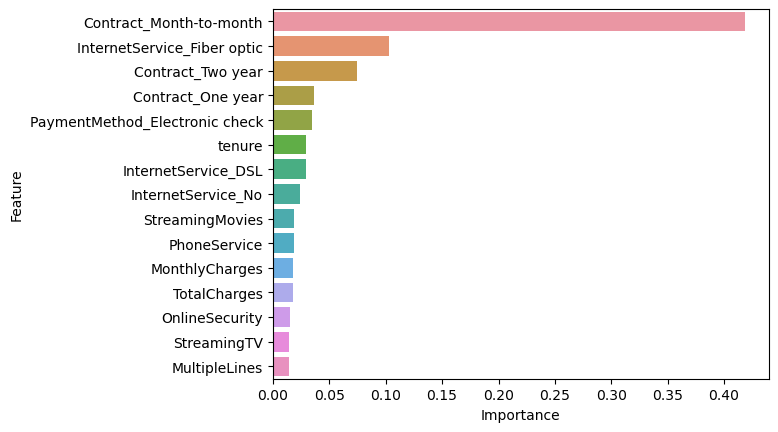

In [52]:
sns.barplot(data=table,y="Feature",x="Importance")